In [129]:
import pandas as pd
import numpy as np 
import datetime
import pandas_profiling
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics.cluster import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import seaborn as sns

## 2.1 Preliminary Analysis 

### Importing Claims Data

In [332]:
claims = pd.read_csv("HWA-Brovsi-WSA-Claims.csv")
claims 

C:\Users\ranon\Anaconda3\envs\idealdsprofiles\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,EMP_ID,CLM_SYS,CLM_REF,WSA_TYP,FLEXBEN_TYPE,CLM_DT,CLM_YR,CLM_AMT,RCPT_DT,RCPT_DAY,DAY_TAG,CLM.STAT,REIMB_DT,REIMB_YR,EA_DT
0,11869,WSA,EFSA0087162,FLXI,5.0,04/11/16,2016,492.00,29/09/16,Thursday,WEEKDAY,3,03/01/17,2017,21/09/17
1,8965,WSA,EFSA0087207,FLXI,4.0,09/11/16,2016,471.00,30/09/16,Friday,WEEKDAY,3,03/01/17,2017,21/09/17
2,8998,WSA,EFSA0087210,FLXI,6.0,09/11/16,2016,496.00,30/09/16,Friday,WEEKDAY,3,07/01/17,2017,21/09/17
3,2098,WSA,EFSA0087208,FLXI,2.0,09/11/16,2016,464.00,03/10/16,Monday,WEEKDAY,3,05/01/17,2017,21/09/17
4,9331,WSA,EFSA0087236,FLXI,2.0,11/11/16,2016,454.00,06/10/16,Thursday,WEEKDAY,3,02/01/17,2017,21/09/17
5,1841,WSA,EFSA0087222,FLXI,3.0,10/11/16,2016,467.00,06/10/16,Thursday,WEEKDAY,3,06/01/17,2017,21/09/17
6,8995,WSA,EFSA0087181,FLXI,4.0,07/11/16,2016,500.00,07/10/16,Friday,WEEKDAY,3,02/01/17,2017,21/09/17
7,8262,WSA,EFSA0087209,FLXI,7.0,09/11/16,2016,493.00,07/10/16,Friday,WEEKDAY,3,03/01/17,2017,21/09/17
8,8755,WSA,EFSA0087163,FLXI,4.0,05/11/16,2016,500.00,08/10/16,Saturday,WEEKEND,3,01/01/17,2017,21/09/17
9,3348,WSA,EFSA0087303,FLXI,5.0,15/11/16,2016,468.00,08/10/16,Saturday,WEEKEND,3,01/01/17,2017,21/09/17


In [433]:
claims.shape

(36772, 12)

In [434]:
claims.groupby('WSA_TYP').mean()

,FLEXBEN_TYPE,CLM_YR,CLM_AMT,RCPT_DAY,REIMB_YR,CLM_AMT_STD
WSA_TYP,,,,,,
BIRT,0.000000,2017.376688,22.085215,4.046478,2017.493612,-0.899176
FLXI,4.209014,2017.385599,294.342146,4.006846,2017.504972,0.581528
MIIS,0.000351,2017.384895,95.959795,3.974707,2017.493443,-0.497399


### Data Sanity Check

In [261]:
pandas_profiling.ProfileReport(claims)

Number of variables,15
Number of observations,36772
Total Missing (%),4.0%
Total size in memory,4.5 MiB
Average record size in memory,128.0 B
Numeric,4
Categorical,7
Boolean,1
Date,0
Text (Unique),1
Rejected,2


In [262]:
# This will describe all of the quantitative values for each column
claims.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
EMP_ID,36772.0,6564.231290,2957.924230,1380.0,4025.75,6724.5,9248.0,11900.0
FLEXBEN_TYPE,20014.0,4.208954,1.981100,1.0,3.00,4.0,6.0,8.0
CLM_YR,36772.0,2017.383444,0.593205,2016.0,2017.00,2017.0,2018.0,2018.0
CLM_AMT,36772.0,187.416632,183.872501,0.2,34.00,100.0,385.0,500.0
CLM.STAT,36772.0,3.000000,0.000000,3.0,3.00,3.0,3.0,3.0
REIMB_YR,36772.0,2017.499755,0.500007,2017.0,2017.00,2017.0,2018.0,2018.0


In [263]:
claims.describe(include='object').T

,count,unique,top,freq
CLM_SYS,36772,1,WSA,36772
CLM_REF,36772,36772,EFSA0100042,1
WSA_TYP,36772,3,FLXI,20013
CLM_DT,36772,768,03/01/18,70
RCPT_DT,36772,786,22/07/18,74
RCPT_DAY,36772,7,Sunday,5310
DAY_TAG,36772,3,WEEKDAY,25247
REIMB_DT,36772,730,26/01/18,73
EA_DT,31663,2,20/09/18,18362


### Initial Insights: 

- Two columns have only 1 single value, CLM_STAT and CLM_SYS. 


    - We should remove them.

- CLM_REF and EMP_ID appears to be a row identifier


    - We should remove CLM_REF.

- Null values in FLEXBEN_TYPE are high due to the number of MIIN and BIRT category claims. 


    - Replace null with 0 (implies absence of a sub-category)
    
- CLM_AMT appears to be highly skewed. 
        
        
    - Data needs to be Normalized 
    

- EA_DT (External Audit Completion Date) only has two unique values. 


    - Consider dummifying variable for clustering
    
- FLEXBEN_TYPE,CLM_YR,REIMB_YR are all categorical variables with numerical values


    - Consider dummifying variables for clustering
    

### Data Cleaning

#### Dropping Columns that 
- have only 1 value
- Are row IDs


In [333]:
# Left with 12 Columns at this point in time
col_drop = ['CLM.STAT', 'CLM_SYS','CLM_REF','EMP_ID']
claims = claims.drop(col_drop, axis=1)
claims.columns

Index(['WSA_TYP', 'FLEXBEN_TYPE', 'CLM_DT', 'CLM_YR', 'CLM_AMT', 'RCPT_DT',
       'RCPT_DAY', 'DAY_TAG', 'REIMB_DT', 'REIMB_YR', 'EA_DT'],
      dtype='object')

#### Clean up Null Values   
- Replace null in FLEXBEN_TYPE with value Zero (0) which acts as a placeholder
- Leave null values from External Audit as is for now (to be dummified)

In [334]:
claims.FLEXBEN_TYPE.fillna(0.0,inplace=True)

#### Standardize CLM_AMT (Claim Amount) 

In [395]:
# #Standardize CLM_AMT

# clmns = ['CLM_AMT']
# claims_std = stats.zscore(claims['CLM_AMT'])
# claims['CLM_AMT_STD'] = claims_std
# claims_std


# ALTERNATIVE WAY TO STANDARDIZE 

# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import Normalizer

# array = claims.values
# claim_amt = array[:,4:5]

# standard_scaler = StandardScaler().fit(claim_amt)
# rescaled_claim_amt = standard_scaler.transform(claim_amt)
# claims['CLM_AMT_STD'] = rescaled_claim_amt


# # normalized_scaler = Normalizer().fit(claim_amt)
# # normalized_claim_amt = normalized_scaler.transform(claim_amt)
# # claims['CLM_AMT_NOR'] = normalized_claim_amt


# print(rescaled_claim_amt)
# print(normalized_claim_amt)

[[ 1.65651475]
 [ 1.54230362]
 [ 1.67826925]
 ...
 [-0.55374249]
 [-0.83981417]
 [-0.81262105]]
[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]


C:\Users\ranon\Anaconda3\envs\idealdsprofiles\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ranon\Anaconda3\envs\idealdsprofiles\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


#### Create Days Before Claim Submission & Reimbursement Columns

In [519]:
claims['days_before_claim_submission']=(pd.to_datetime(claims.CLM_DT,dayfirst=True)-pd.to_datetime(claims.RCPT_DT,dayfirst=True))/pd.Timedelta(1, unit='d')

claims['days_before_reimbursement']=(pd.to_datetime(claims.REIMB_DT,dayfirst=True)-pd.to_datetime(claims.CLM_DT,dayfirst=True))/pd.Timedelta(1,unit='d')


# ------------------------------------------------------------------------------

## Unsupervised Learning 
-  K-Means Clustering 
-  PCA 

### Preparing Data For Unsupervised Learning

In [525]:
# Creating A Spare Copy before introducing new columns
claims_with_dummy = claims

#### Identifying Numerical / Categorical Columns (to convert for clustering) 

In [529]:
claims_with_dummy.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
FLEXBEN_TYPE,36772.0,2.290819,2.555447,0.0,0.0,1.0,4.0,8.0
CLM_YR,36772.0,2017.383444,0.593205,2016.0,2017.0,2017.0,2018.0,2018.0
CLM_AMT,36772.0,187.416632,183.872501,0.2,34.0,100.0,385.0,500.0
REIMB_YR,36772.0,2017.499755,0.500007,2017.0,2017.0,2017.0,2018.0,2018.0
days_before_claim_submission,36772.0,18.343468,10.269870,1.0,9.0,18.0,27.0,40.0
days_before_reimbursement,36772.0,42.482541,10.679951,21.0,34.0,43.0,52.0,60.0


In [530]:
claims_with_dummy.describe(exclude='number').T

,count,unique,top,freq
WSA_TYP,36772,3,FLXI,20013
CLM_DT,36772,768,03/01/18,70
RCPT_DT,36772,786,22/07/18,74
RCPT_DAY,36772,7,Sunday,5310
DAY_TAG,36772,3,WEEKDAY,25247
REIMB_DT,36772,730,26/01/18,73
EA_DT,31663,2,20/09/18,18362


#### RCPT_DAY convert to numeric -> Decide not too as the number would not have significant meaning during clustering. Sunday isn't a greater value than Tuesday.

In [528]:
#### Convert  RCPT_DAY to Numeric Values
# claims_with_dummy.RCPT_DAY.replace({'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,
#                                           'Friday':5,'Saturday':6,'Sunday':7}, inplace=True)


#### Convert  RCPT_DAY from Numeric to Actual Day Values
# claims_with_dummy.RCPT_DAY.replace({1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',
#                                           5:'Friday',6:'Saturday',7:'Sunday'}, inplace=True)


#### Dummify categorical Variables:
- External Audit Completion Date
- FLEXBEN_TYPE
- CLM_YR
- REIMB_YR
- DAY_TAG 
- WSA_TYP
- RCPT_DAY (Either Convert To Numeric or Dummify) *


In [531]:
dummy_cols = ["EA_DT","FLEXBEN_TYPE","CLM_YR","REIMB_YR",'DAY_TAG','WSA_TYP','RCPT_DAY']
claims_with_dummy = pd.get_dummies(claims, columns=dummy_cols)

In [532]:
claims_clustering = claims_with_dummy

### Select Numerical Features for Clustering

In [534]:
num_cols = claims_clustering.select_dtypes(include='number').columns
claims_clustering = claims_clustering[num_cols]

### Scaling the data


In [460]:
# Take the float values of df for X
X = claims_clustering[num_cols].values.astype(np.float64)

# Define the scaler and scale the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

### Clustering

### Checking For Optimum Clusters  
Checking the number of clusters:

- Silhouette method
- Elbow curve

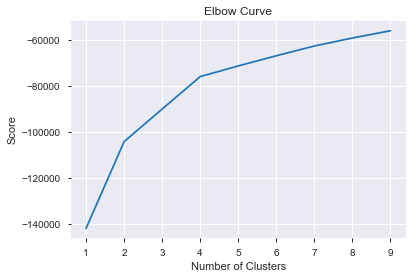

In [464]:
# PLOTTING ELBOW CURVE 
clust = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in clust]
score = [kmeans[i].fit(X_scaled).score(X_scaled) for i in range(len(kmeans))]
plt.plot(clust,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

### Possible Fraud Detection Methods
- Distance from Centroid
- Smallest Clusters

### Identifying fraud through outliers (based on distance to centroid)


In [488]:
y= claims_valid.RISK

# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=5)

# Define K-means model and run the kmeans model on scaled data
kmeans = KMeans(n_clusters=4, random_state=5,n_jobs=-1).fit(X_train)

# Get the cluster number for each datapoint
X_test_clusters = kmeans.predict(X_test)

# Save the cluster centroids
X_test_clusters_centers = kmeans.cluster_centers_

# Calculate the distance to the cluster centroid for each point
dist = [np.linalg.norm(x-y) for x,y in zip(X_test,
X_test_clusters_centers[X_test_clusters])]
 

# Create fraud predictions based on outliers on clusters (by distance from centroid)
km_y_pred = np.array(dist)
km_y_pred[dist>=np.percentile(dist, 95)] = 1
km_y_pred[dist<np.percentile(dist, 95)] = 0

#### Sanity Check of Results 
-  Explore the data points that have been flagged out as outliers
-  Check against labels in Dataset B 
-  Check with Fraud Expert

#### Using the 95th Percentile, we get the top 5th percentile of claims in distance from the cluster centroid

In [510]:
# Counting Number of Predicted Risk and Non-Risk values in the Predicted Data Set
np.bincount(km_y_pred.astype('int64'))

array([10480,   552], dtype=int64)

#### Compare prediction results against actual Risk Labels from Dataset B

0.5088729772835748
[[8349  406]
 [2131  146]]


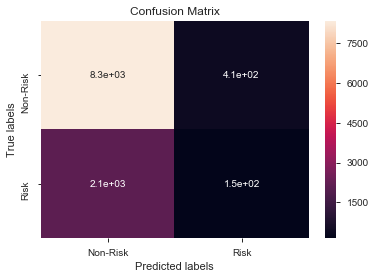

In [500]:
# Obtain the ROC score
print(roc_auc_score(y_test, km_y_pred))

# # Create a confusion matrix
km_cm = confusion_matrix(y_test, km_y_pred)

# # Plot the confusion matrix in a figure to visualize results 
# plot_confusion_matrix(km_cm)
print(km_cm)

ax= plt.subplot()
sns.heatmap(km_cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Non-Risk', 'Risk']); ax.yaxis.set_ticklabels(['Non-Risk', 'Risk']);


In [513]:
#Recall
print(km_cm[1][1]/(km_cm[0,1]+km_cm[1,1]))

#Precision
print(km_cm[1][1]/(km_cm[1,0]+km_cm[1,1]))

0.2644927536231884
0.06411945542380325


### Identifying fraud through Smallest Cluster Size

#### DB scan. To be done in the future

## 2.2 Risk Analysis

In [2]:
claims_valid = pd.read_csv("HWA-Brovsi-WSA-Claims-Validated.csv")
claims_valid.head()

C:\Users\ranon\Anaconda3\envs\idealdsprofiles\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,EMP_ID,CLM_SYS,CLM_REF,WSA_TYP,FLEXBEN_TYPE,CLM_DT,CLM_YR,CLM_AMT,RCPT_DT,RCPT_DAY,DAY_TAG,CLM.STAT,REIMB_DT,REIMB_YR,EA_DT,RISK
0,11869,WSA,EFSA0087162,FLXI,5.0,4/11/16,2016,492.0,29/9/16,Thursday,WEEKDAY,3,3/1/17,2017,21/9/17,1
1,8965,WSA,EFSA0087207,FLXI,4.0,9/11/16,2016,471.0,30/9/16,Friday,WEEKDAY,3,3/1/17,2017,21/9/17,1
2,8998,WSA,EFSA0087210,FLXI,6.0,9/11/16,2016,496.0,30/9/16,Friday,WEEKDAY,3,7/1/17,2017,21/9/17,1
3,2098,WSA,EFSA0087208,FLXI,2.0,9/11/16,2016,464.0,3/10/16,Monday,WEEKDAY,3,5/1/17,2017,21/9/17,1
4,9331,WSA,EFSA0087236,FLXI,2.0,11/11/16,2016,454.0,6/10/16,Thursday,WEEKDAY,3,2/1/17,2017,21/9/17,1


In [5]:
pandas_profiling.ProfileReport(claims_valid)

Number of variables,16
Number of observations,36772
Total Missing (%),3.7%
Total size in memory,4.8 MiB
Average record size in memory,136.0 B
Numeric,4
Categorical,7
Boolean,2
Date,0
Text (Unique),1
Rejected,2


### Data Cleaning 
- Dropping columns that have constant values or are row IDs
- Fill NA for Flex benefit sub categories

In [3]:
# Left with 12 Columns at this point in time
col_drop = ['CLM.STAT', 'CLM_SYS','CLM_REF']
claims_valid = claims_valid.drop(col_drop, axis=1)
claims_valid.columns

Index(['EMP_ID', 'WSA_TYP', 'FLEXBEN_TYPE', 'CLM_DT', 'CLM_YR', 'CLM_AMT',
       'RCPT_DT', 'RCPT_DAY', 'DAY_TAG', 'REIMB_DT', 'REIMB_YR', 'EA_DT',
       'RISK'],
      dtype='object')

In [4]:
claims_valid['CLM_DT_MONTH'] = pd.DatetimeIndex(claims_valid.CLM_DT).month
claims_valid['CLM_DT_DAY'] = pd.DatetimeIndex(claims_valid.CLM_DT).day
claims_valid['RCPT_DT_MONTH'] = pd.DatetimeIndex(claims_valid.RCPT_DT).month
claims_valid['RCPT_DT_DAY'] = pd.DatetimeIndex(claims_valid.RCPT_DT).day
claims_valid['RCPT_DT_YEAR'] = pd.DatetimeIndex(claims_valid.RCPT_DT).year
claims_valid['REIMB_DT_MONTH'] = pd.DatetimeIndex(claims_valid.REIMB_DT).month
claims_valid['REIMB_DT_DAY'] = pd.DatetimeIndex(claims_valid.REIMB_DT).day


In [5]:
claims_valid.FLEXBEN_TYPE.fillna(0.0,inplace=True)


#### Adding Days before claim subm and reimbursement columns

In [6]:
claims_valid['days_before_claim_submission']=(pd.to_datetime(claims_valid.CLM_DT,dayfirst=True)-pd.to_datetime(claims_valid.RCPT_DT,dayfirst=True))/pd.Timedelta(1, unit='d')
claims_valid['days_before_reimbursement']=(pd.to_datetime(claims_valid.REIMB_DT,dayfirst=True)-pd.to_datetime(claims_valid.CLM_DT,dayfirst=True))/pd.Timedelta(1,unit='d')


### Exploration

#### Checking the imbalance level in risk v.s. non-risk

- Insight: 
    - Non-Risky: 0.798597
    - Risky:     0.201403

In [10]:
risky = claims_valid.RISK.value_counts()
# Print the ratio of risky cases
print(risky / len(claims_valid))

0    0.798597
1    0.201403
Name: RISK, dtype: float64


#### Checking if any particular Category of benefits has a higher risk of fraud

- Insight
    - : No Particular WSA_TYP category has a particularly high risk
    - : No Particular FLEXBEN_TYPE category within FLEXIBLE benefits has a particularly high risk
        - Highest was 8.0 (0.316) Prof. Membership Fees followed by 6.0 (0.281)	Personal/Work Enrichment

In [437]:
claims_valid.groupby('WSA_TYP').mean()

,EMP_ID,FLEXBEN_TYPE,CLM_YR,CLM_AMT,CLM.STAT,REIMB_YR,RISK
WSA_TYP,,,,,,,
BIRT,6732.317922,NaN,2017.376688,22.085215,3.0,2017.493612,0.182991
FLXI,6509.527457,4.209014,2017.385599,294.342146,3.0,2017.504972,0.220806
MIIS,6530.657963,3.000000,2017.384895,95.959795,3.0,2017.493443,0.173653


In [438]:
claims_valid[claims_valid.WSA_TYP=="FLXI"].groupby(claims_valid.FLEXBEN_TYPE).mean()

,EMP_ID,FLEXBEN_TYPE,CLM_YR,CLM_AMT,CLM.STAT,REIMB_YR,RISK
FLEXBEN_TYPE,,,,,,,
1.0,7065.530244,1.0,2017.376585,338.340688,3.0,2017.505366,0.226341
2.0,6345.695793,2.0,2017.382416,275.597255,3.0,2017.498382,0.223301
3.0,6443.598444,3.0,2017.378920,213.484008,3.0,2017.499646,0.199953
4.0,7094.034337,4.0,2017.372361,378.188235,3.0,2017.494230,0.210245
5.0,5530.326518,5.0,2017.392193,357.026772,3.0,2017.513321,0.204771
6.0,7127.656000,6.0,2017.389714,373.543223,3.0,2017.508571,0.281143
7.0,6601.146727,7.0,2017.405756,205.891267,3.0,2017.518341,0.233634
8.0,6003.673653,8.0,2017.390719,341.337979,3.0,2017.497006,0.315868


### Using statistics to define normal behavior

- Insight: 
    - Fraudulent claims have a higher % of claims <=100
    - Top Flexi Sub-Categories for non-fraud = 3,4,5
    - Top Flexi Sub-Categories for fraud = 4,5,6


#### Analyze the average amounts spend in normal transactions versus fraud transactions. This gives you an idea of how fraudulent transactions differ structurally from normal transactions.


In [582]:
claims_fraud.CLM_AMT.value_counts().nlargest(5)

100.0    1307
500.0     892
30.0      706
4.5        73
3.6        70
Name: CLM_AMT, dtype: int64

In [583]:
claims_non_fraud.CLM_AMT.value_counts().nlargest(5)

100.0    5551
500.0    3730
30.0     3068
4.5       345
3.6       283
Name: CLM_AMT, dtype: int64

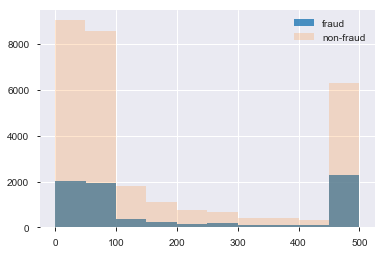

In [541]:
# Create two dataframes with fraud and non-fraud data 
claims_fraud = claims_valid.loc[claims_valid.RISK == 1] 
claims_non_fraud = claims_valid.loc[claims_valid.RISK == 0] 

# Plot histograms of the amounts in fraud and non-fraud data 
plt.hist(claims_fraud.CLM_AMT, alpha=0.8, label='fraud')
plt.hist(claims_non_fraud.CLM_AMT, alpha=0.2, label='non-fraud')
plt.legend()
plt.show()


#### Analyze the categories spent in normal transactions versus fraud transactions. 

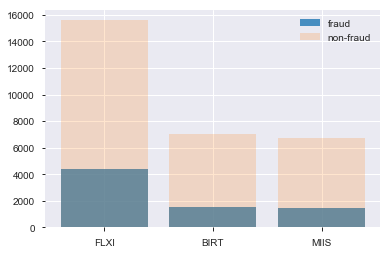

In [577]:
plt.bar(claims_fraud.WSA_TYP.unique().tolist(),claims_fraud.WSA_TYP.value_counts().values.tolist(), alpha=0.8, label='fraud')
plt.bar(claims_non_fraud.WSA_TYP.unique().tolist(),claims_non_fraud.WSA_TYP.value_counts().values.tolist(), alpha=0.2, label='non-fraud')
plt.legend()
plt.show()


#### Analyze the sub-categories spent in FLXI Benefits normal transactions versus fraud transactions. 

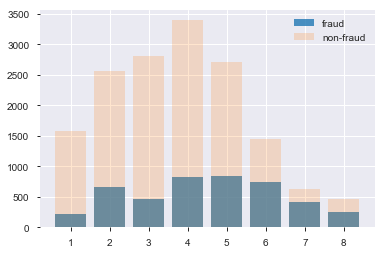

In [578]:
plt.bar(claims_fraud[claims_fraud.WSA_TYP=='FLXI'].FLEXBEN_TYPE.unique().tolist(),claims_fraud[claims_fraud.WSA_TYP=='FLXI'].FLEXBEN_TYPE.value_counts().values.tolist(), alpha=0.8, label='fraud')
plt.bar(claims_non_fraud[claims_non_fraud.WSA_TYP=='FLXI'].FLEXBEN_TYPE.unique().tolist(),claims_non_fraud[claims_non_fraud.WSA_TYP=='FLXI'].FLEXBEN_TYPE.value_counts().values.tolist(), alpha=0.2, label='non-fraud')
# plt.bar(claims_non_fraud.WSA_TYP.unique().tolist(),claims_non_fraud.WSA_TYP.value_counts().values.tolist(), alpha=0.2, label='non-fraud')
plt.legend()
plt.show()

### Correlation Analysis

- Insights: 
    - FLEXBEN_TYPE and CLAIM AMT = 0.5 
    - REIMB_YR & CLM_YR = 0.84
    - Daysbeforeclaimsubmission & CLM_AMT = 0.258
    - Daysbeforeclaimsubmission & RISK = 0.29
    - days_before_reimbursement & RISK = 0.29

In [643]:
claims_valid.corr()

,EMP_ID,FLEXBEN_TYPE,CLM_YR,CLM_AMT,REIMB_YR,RISK,days_before_claim_submission,days_before_reimbursement
EMP_ID,1.000000,-0.034525,0.000659,-0.011043,-0.005034,0.007212,0.006458,-0.000822
FLEXBEN_TYPE,-0.034525,1.000000,0.009552,0.502063,0.013550,0.056340,0.112339,0.040163
CLM_YR,0.000659,0.009552,1.000000,0.003858,0.841373,-0.003062,0.012210,-0.046239
CLM_AMT,-0.011043,0.502063,0.003858,1.000000,0.005232,0.076851,0.258381,-0.067962
REIMB_YR,-0.005034,0.013550,0.841373,0.005232,1.000000,0.013943,0.002627,0.003974
RISK,0.007212,0.056340,-0.003062,0.076851,0.013943,1.000000,0.290451,0.291179
days_before_claim_submission,0.006458,0.112339,0.012210,0.258381,0.002627,0.290451,1.000000,-0.177414
days_before_reimbursement,-0.000822,0.040163,-0.046239,-0.067962,0.003974,0.291179,-0.177414,1.000000


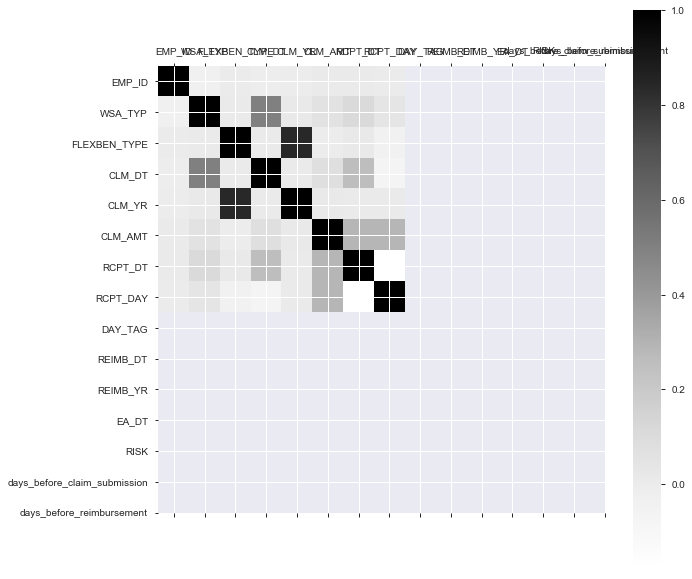

In [659]:
plt.figure(figsize=(10,10))
plt.matshow(claims_valid.corr(), fignum=1)
 
plt.xticks(range(len(claims_valid.columns)), claims_valid.columns)
plt.yticks(range(len(claims_valid.columns)), claims_valid.columns)
plt.colorbar()
plt.show()

#### Variables to analyze across Time
- CLM_AMT -> across (RCPT_DT / RCPT_DAY / DAY_TAG) 
- WSA TYP -> across (RCPT_DT / RCPT_DAY / DAY_TAG) 
- FLEXBEN_TYPE (Within FLXI WSA_TYP) -> across (RCPT_DT / RCPT_DAY / DAY_TAG) 
- days_before_claim_submission -> across (RCPT_DT / RCPT_DAY / DAY_TAG) 
- days_before_reimbursement  -> Analyze across Reimb DT 



- INSIGHT: 

    - Fraud cases:
        - Average Claim Amt is higher for Fraud cases
        - Average Claim Amt is higher on Wkends
        - Avg Claim Amt spikes on Sundays and and dips on Mondays
    - Non-Fraud cases: 
        - Average Claim Amt is lower for non-fraud cases
        - Average Claim Amt is higher on Wkdays
        - Avg Claim Amt remains below 190 and is highest on Tuesdays

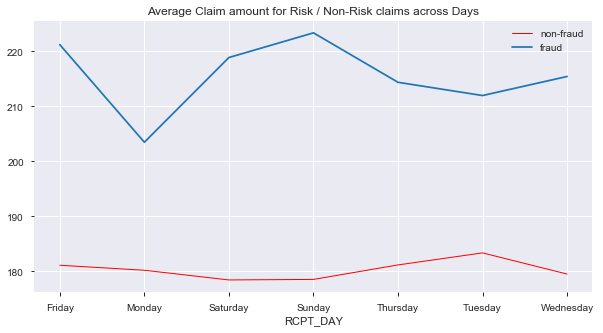

In [661]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(111)

# ax1.plot(claims_fraud.RCPT_DAY.unique().tolist(), claims_fraud.groupby(claims_valid.RCPT_DAY).CLM_AMT.mean(), color='lightblue', linewidth=3)
# claims_non_fraud.groupby(claims_valid.RCPT_DAY).CLM_AMT.mean().plot(ax=ax1,label='non-fraud')

ax1.plot(claims_non_fraud.RCPT_DAY.unique().tolist(), claims_non_fraud.groupby(claims_non_fraud.RCPT_DAY).CLM_AMT.mean(),label='non-fraud', color='red', linewidth=1)
claims_fraud.groupby(claims_fraud.RCPT_DAY).CLM_AMT.mean().plot(ax=ax1,label='fraud')
plt.title("Average Claim amount for Risk / Non-Risk claims across Days")
plt.legend() 
plt.show() 

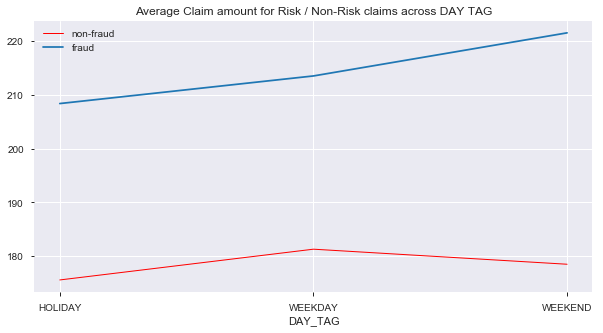

In [664]:
fig = plt.figure(figsize=(10,5))
ax2 = fig.add_subplot(111)

# ax1.plot(claims_fraud.RCPT_DAY.unique().tolist(), claims_fraud.groupby(claims_valid.RCPT_DAY).CLM_AMT.mean(), color='lightblue', linewidth=3)
# claims_non_fraud.groupby(claims_valid.RCPT_DAY).CLM_AMT.mean().plot(ax=ax1,label='non-fraud')

ax2.plot(claims_non_fraud.DAY_TAG.unique().tolist(), claims_non_fraud.groupby(claims_non_fraud.DAY_TAG).CLM_AMT.mean(),label='non-fraud', color='red', linewidth=1)
claims_fraud.groupby(claims_fraud.DAY_TAG).CLM_AMT.mean().plot(ax=ax2,label='fraud')
plt.title("Average Claim amount for Risk / Non-Risk claims across DAY TAG")
plt.legend() 
plt.show() 

In [590]:
print(claims_valid.groupby('RCPT_DAY').agg({'CLM_AMT':['mean','median']}))
print(claims_fraud.groupby('RCPT_DAY').agg({'CLM_AMT':['mean','median']}))
print(claims_non_fraud.groupby('RCPT_DAY').agg({'CLM_AMT':['mean','median']}))


              CLM_AMT       
                 mean median
RCPT_DAY                    
Friday     188.863418  100.0
Monday     184.737885  100.0
Saturday   186.640837  100.0
Sunday     187.614205  100.0
Thursday   187.882662  100.0
Tuesday    189.265554  100.0
Wednesday  186.870388  100.0
              CLM_AMT       
                 mean median
RCPT_DAY                    
Friday     221.202857  100.0
Monday     203.464873  100.0
Saturday   218.864505  100.0
Sunday     223.351003  100.0
Thursday   214.360887  100.0
Tuesday    211.955137  100.0
Wednesday  215.418310  100.0
              CLM_AMT       
                 mean median
RCPT_DAY                    
Friday     181.097697  100.0
Monday     180.189648  100.0
Saturday   178.425606  100.0
Sunday     178.521710  100.0
Thursday   181.156825  100.0
Tuesday    183.343244  100.0
Wednesday  179.496668  100.0


### 13.9% (5109) of claims didn’t appear to be audited. Need to analyse these claims more 

In [117]:
ea_dates = claims_valid.EA_DT.value_counts().index.values.tolist()
ea_dates

['20/9/18', '21/9/17']

In [121]:
unaudited_claims.head()

,EMP_ID,WSA_TYP,FLEXBEN_TYPE,CLM_DT,CLM_YR,CLM_AMT,RCPT_DT,RCPT_DAY,DAY_TAG,REIMB_DT,...,RISK,CLM_DT_MONTH,CLM_DT_DAY,RCPT_DT_MONTH,RCPT_DT_DAY,RCPT_DT_YEAR,REIMB_DT_MONTH,REIMB_DT_DAY,days_before_claim_submission,days_before_reimbursement
31663,8832,MIIS,0.0,14/8/18,2018,100.0,21/7/18,Saturday,WEEKEND,8/10/18,...,1,8,14,7,21,2018,8,10,24.0,55.0
31664,8863,BIRT,0.0,21/8/18,2018,22.8,21/7/18,Saturday,WEEKEND,15/10/18,...,1,8,21,7,21,2018,10,15,31.0,55.0
31665,6129,FLXI,8.0,27/8/18,2018,466.0,21/7/18,Saturday,WEEKEND,24/10/18,...,1,8,27,7,21,2018,10,24,37.0,58.0
31666,2889,BIRT,0.0,25/7/18,2018,13.8,22/7/18,Sunday,WEEKEND,25/8/18,...,0,7,25,7,22,2018,8,25,3.0,31.0
31667,10163,MIIS,0.0,31/7/18,2018,100.0,22/7/18,Sunday,WEEKEND,31/8/18,...,0,7,31,7,22,2018,8,31,9.0,31.0


In [124]:
unaudited_claims.WSA_TYP.value_counts()

FLXI    2743
MIIS    1189
BIRT    1177
Name: WSA_TYP, dtype: int64

In [123]:
unaudited_claims.FLEXBEN_TYPE.value_counts()

0.0    2366
3.0     586
7.0     481
4.0     467
5.0     446
1.0     290
2.0     265
6.0     122
8.0      86
Name: FLEXBEN_TYPE, dtype: int64

In [119]:
unaudited_claims = claims_valid[claims_valid.EA_DT.isna()]
unaudited_claims[unaudited_claims.REIMB_DT>ea_dates[1]].shape[0]


2888


### Checking the Effectiveness of internal controls based on preliminary analysis

#### Checking for anomalies in Claim Dates 
 - Check against WSA Claim Policy Rules
     - (30-60 Days Reimbursement |  1-31 days Submission) 
     
 - Check if days_before_claim_submission and days_before_reimbursement 

    - Exceed / Go below Rules

 - Check if there are any individuals who make too many claims within a specific time period

#### Number of Claims with late submissions
- 3484

In [37]:
#Instance of Late Claim Submission: 
time_for_submission = claims_valid.days_before_claim_submission.value_counts().reset_index()
time_for_submission.rename(columns={"index":"days_to_submit","days_before_claim_submission":"number_of_claims"},inplace=True)
late_claim_submission = time_for_submission[time_for_submission.days_to_submit>31]
early_claim_submission = time_for_submission[time_for_submission.days_to_submit<1]
print(late_claim_submission.number_of_claims.sum())
print(early_claim_submission.number_of_claims.sum())

3484
0


#### Number of Employees with late submissions
- 3002 
- 39% of all Employees

In [36]:
print(claims_valid[claims_valid.days_before_claim_submission>31].EMP_ID.unique().size)
print(claims_valid[claims_valid.days_before_claim_submission>31].EMP_ID.unique().size/claims_valid.EMP_ID.unique().size)

3002
0.39012345679012345


In [53]:
claims_valid[claims_valid.days_before_claim_submission>31].groupby('EMP_ID').agg({"days_before_claim_submission":'count'}).sort_values('days_before_claim_submission',ascending=False)

,days_before_claim_submission
EMP_ID,
3478,4
4234,4
11208,4
3212,4
4483,4
6459,3
6471,3
10897,3
8529,3


#### Number of Claims with Early and Late Reimbursement
- Early : 4398
- Late  : 0

In [38]:
claims_valid.days_before_reimbursement.value_counts().reset_index()

,index,days_before_reimbursement
0,30.0,1238
1,36.0,1093
2,55.0,1082
3,53.0,1082
4,39.0,1067
5,31.0,1063
6,49.0,1062
7,46.0,1061
8,43.0,1055
9,40.0,1055


In [42]:
#Instance of Late Claim Submission: 
time_for_reimbursement = claims_valid.days_before_reimbursement.value_counts().reset_index()
time_for_reimbursement.rename(columns={"index":"days_to_reimburse","days_before_reimbursement":"number_of_claims"},inplace=True)
late_claim_reimb = time_for_reimbursement[time_for_reimbursement.days_to_reimburse>60]
early_claim_reimb = time_for_reimbursement[time_for_reimbursement.days_to_reimburse<30]

print(early_claim_reimb.number_of_claims.sum())
print(late_claim_reimb.number_of_claims.sum())


4398
0


#### Number of Employees who were reimbursed Early
- 3612 
- 47% of all Employees

In [43]:
print(claims_valid[claims_valid.days_before_reimbursement<30].EMP_ID.unique().size)
print(claims_valid[claims_valid.days_before_reimbursement<30].EMP_ID.unique().size/claims_valid.EMP_ID.unique().size)

3612
0.46939571150097464


In [54]:
claims_valid[claims_valid.days_before_reimbursement<30].groupby('EMP_ID').agg({"days_before_reimbursement":'count'}).sort_values('days_before_reimbursement',ascending=False)

,days_before_reimbursement
EMP_ID,
9648,5
9920,4
6498,4
4363,4
7521,4
5248,4
8365,4
2221,4
7708,3


### Instances where Employees exceed Maximum amount for each of the Claim Categories in a year

In [74]:
# Aggregate claim amount per category per annum per Employee 
claims_per_annum = claims_valid.groupby(['WSA_TYP','CLM_YR','EMP_ID']).agg({'CLM_AMT':'sum'}).reset_index()
claims_per_annum.sort_values('CLM_AMT',ascending=False)



,WSA_TYP,CLM_YR,EMP_ID,CLM_AMT
8890,FLXI,2017,6172,2210.90
10767,FLXI,2017,9846,2098.16
14809,FLXI,2018,8723,2081.42
6850,FLXI,2017,1729,1993.00
7347,FLXI,2017,2741,1990.00
15062,FLXI,2018,9163,1989.00
14146,FLXI,2018,7177,1985.00
7523,FLXI,2017,3174,1979.00
12013,FLXI,2018,2066,1962.00
14475,FLXI,2018,7911,1960.60


In [67]:
claims_per_annum.WSA_TYP.value_counts()

FLXI    10766
MIIS     6722
BIRT     5616
Name: WSA_TYP, dtype: int64

In [71]:
flexi_wsa_type = claims_per_annum[claims_per_annum.WSA_TYP=='FLXI']
print(flexi_wsa_type[flexi_wsa_type.CLM_AMT>500].shape[0])
miis_wsa_type = claims_per_annum[claims_per_annum.WSA_TYP=='MIIS']
print(miis_wsa_type[miis_wsa_type.CLM_AMT>300].shape[0])
birthday_wsa_type = claims_per_annum[claims_per_annum.WSA_TYP=='BIRT']
print(birthday_wsa_type[birthday_wsa_type.CLM_AMT>30].shape[0])

3183
32
1802


In [84]:
flexi_wsa_type[flexi_wsa_type.CLM_AMT>1000].sort_values('CLM_AMT',ascending=False)

,WSA_TYP,CLM_YR,EMP_ID,CLM_AMT
8890,FLXI,2017,6172,2210.90
10767,FLXI,2017,9846,2098.16
14809,FLXI,2018,8723,2081.42
6850,FLXI,2017,1729,1993.00
7347,FLXI,2017,2741,1990.00
15062,FLXI,2018,9163,1989.00
14146,FLXI,2018,7177,1985.00
7523,FLXI,2017,3174,1979.00
12013,FLXI,2018,2066,1962.00
14475,FLXI,2018,7911,1960.60


In [79]:
miis_wsa_type[miis_wsa_type.CLM_AMT>300].sort_values('CLM_AMT',ascending=False).head(10)

,WSA_TYP,CLM_YR,EMP_ID,CLM_AMT
20217,MIIS,2018,1633,405.0
20315,MIIS,2018,1856,404.0
18850,MIIS,2017,7881,402.0
18540,MIIS,2017,6878,401.0
21493,MIIS,2018,6153,401.0
21565,MIIS,2018,6444,394.0
20952,MIIS,2018,4239,383.0
17000,MIIS,2017,1871,383.0
17012,MIIS,2017,1902,341.0
22788,MIIS,2018,10411,308.0


In [80]:
birthday_wsa_type[birthday_wsa_type.CLM_AMT>30].sort_values('CLM_AMT',ascending=False).head(10)

,WSA_TYP,CLM_YR,EMP_ID,CLM_AMT
2314,BIRT,2017,8876,129.0
4189,BIRT,2018,5999,113.0
4491,BIRT,2018,7466,99.0
4655,BIRT,2018,8123,99.0
2835,BIRT,2017,10402,98.4
3357,BIRT,2018,2081,98.0
3446,BIRT,2018,2394,97.0
4155,BIRT,2018,5854,97.0
3676,BIRT,2018,3430,97.0
4417,BIRT,2018,7143,97.0


### Which Employees made the highest number of claims
Top 10 Employees that made the most claims: 
1.	6243 -> 44 claims -> Anomaly? 
2.	7713 -> 38 claims
3.	3122 -> 34 claims
4.	6707 -> 31 claims
5.	7420 -> 31 claims
6.	8808 -> 30
7.	9036 -> 29
8.	8603 -> 29
9.	2994 -> 29 
10.	4592 -> 28


### Machine Learning 

#### Prepping data for ML models

In [134]:
valid_claims_ml = claims_valid.drop(['CLM_DT','REIMB_DT','RCPT_DT','EMP_ID'],axis=1)

In [135]:
dummy_cols = ["EA_DT","FLEXBEN_TYPE","CLM_YR","REIMB_YR",'DAY_TAG','WSA_TYP','RCPT_DAY']
valid_claims_ml = pd.get_dummies(valid_claims_ml, columns=dummy_cols)

#### Imbalance level in risk v.s. non-risk

- Insight: 
    - Non-Risky: 0.798597
    - Risky:     0.201403

In [136]:
valid_claims_ml.head(20)

,CLM_AMT,RISK,CLM_DT_MONTH,CLM_DT_DAY,RCPT_DT_MONTH,RCPT_DT_DAY,RCPT_DT_YEAR,REIMB_DT_MONTH,REIMB_DT_DAY,days_before_claim_submission,...,WSA_TYP_BIRT,WSA_TYP_FLXI,WSA_TYP_MIIS,RCPT_DAY_Friday,RCPT_DAY_Monday,RCPT_DAY_Saturday,RCPT_DAY_Sunday,RCPT_DAY_Thursday,RCPT_DAY_Tuesday,RCPT_DAY_Wednesday
0,492.00,1,4,11,9,29,2016,3,1,36.0,...,0,1,0,0,0,0,0,1,0,0
1,471.00,1,9,11,9,30,2016,3,1,40.0,...,0,1,0,1,0,0,0,0,0,0
2,496.00,1,9,11,9,30,2016,7,1,40.0,...,0,1,0,1,0,0,0,0,0,0
3,464.00,1,9,11,3,10,2016,5,1,37.0,...,0,1,0,0,1,0,0,0,0,0
4,454.00,1,11,11,6,10,2016,2,1,36.0,...,0,1,0,0,0,0,0,1,0,0
5,467.00,1,10,11,6,10,2016,6,1,35.0,...,0,1,0,0,0,0,0,1,0,0
6,500.00,1,7,11,7,10,2016,2,1,31.0,...,0,1,0,1,0,0,0,0,0,0
7,493.00,1,9,11,7,10,2016,3,1,33.0,...,0,1,0,1,0,0,0,0,0,0
8,500.00,0,5,11,8,10,2016,1,1,28.0,...,0,1,0,0,0,1,0,0,0,0
9,468.00,1,11,15,8,10,2016,1,1,38.0,...,0,1,0,0,0,1,0,0,0,0


#### Resampling imbalanced data using SMOTE & Splitting into Train Test 

In [138]:
# Define resampling method 
method = SMOTE(kind='borderline1')

# Split into train and test
X = valid_claims_ml.drop('RISK',axis=1)
y=  valid_claims_ml.RISK

X_train, X_test, y_train, y_test = train_test_split(X, y,
 train_size=0.7, random_state=5)


# Apply resampling to the training data only
X_resampled, y_resampled = method.fit_sample(X_train, y_train)


#### Testing On Logistic Regression Model

C:\Users\ranon\Anaconda3\envs\idealdsprofiles\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ROC SCORE: 0.7000309285438472
ACCURACY SCORE: 0.8633067440174039
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      8858
           1       0.78      0.43      0.55      2174

    accuracy                           0.86     11032
   macro avg       0.83      0.70      0.74     11032
weighted avg       0.85      0.86      0.85     11032

[[8588  270]
 [1238  936]]


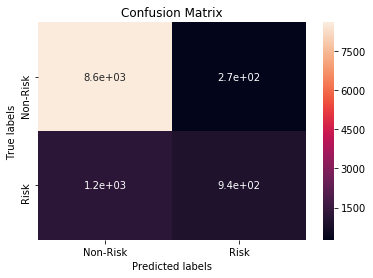

In [143]:
# Continue fitting the model and obtain predictions
model = LogisticRegression()
model.fit(X_train, y_train)

# Get your performance metrics
predicted = model.predict(X_test)
probs = model.predict_proba(X_test)

print("ROC SCORE: " + str(roc_auc_score(y_test, predicted)))

print ("ACCURACY SCORE: " + str(accuracy_score(y_test, predicted)))

print (classification_report(y_test, predicted))

km_cm = confusion_matrix(y_true=y_test, y_pred=predicted)

# # Plot the confusion matrix in a figure to visualize results 
# plot_confusion_matrix(km_cm)
print(km_cm)

ax= plt.subplot()
sns.heatmap(km_cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Non-Risk', 'Risk']); ax.yaxis.set_ticklabels(['Non-Risk', 'Risk']);


#### Testing on Random Forest Classifier

C:\Users\ranon\Anaconda3\envs\idealdsprofiles\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ROC SCORE: 0.7144074566662852
ACCURACY SCORE: 0.8688361131254533
CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      8858
           1       0.79      0.46      0.58      2174

    accuracy                           0.87     11032
   macro avg       0.83      0.71      0.75     11032
weighted avg       0.86      0.87      0.85     11032

[[8586  272]
 [1175  999]]


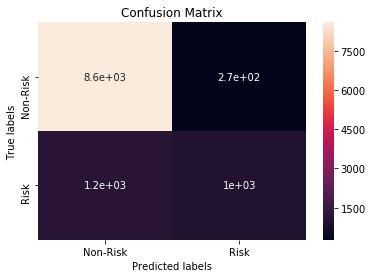

In [151]:
model = RandomForestClassifier(random_state=5)
model.fit(X_train, y_train)
predicted = model.predict(X_test)
probs = model.predict_proba(X_test)

print("ROC SCORE: " + str(roc_auc_score(y_test, predicted)))
print ("ACCURACY SCORE: " + str(accuracy_score(y_test, predicted)))
print ("CLASSIFICATION REPORT: \n" + classification_report(y_test, predicted))

km_cm = confusion_matrix(y_true=y_test, y_pred=predicted)

# # Plot the confusion matrix in a figure to visualize results 
# plot_confusion_matrix(km_cm)
print(km_cm)

ax= plt.subplot()
sns.heatmap(km_cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Non-Risk', 'Risk']); ax.yaxis.set_ticklabels(['Non-Risk', 'Risk']);



#### Implement Grid Search to select best parameters for Random Forest Classifier

In [152]:
# Create the parameter grid 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

 # Define which model to use
model = RandomForestClassifier(random_state=5)
 # Instantiate the grid search model
grid_search_model = GridSearchCV(estimator = model, 
param_grid = param_grid, cv = 5,
n_jobs = -1, scoring='f1')

# Fit the grid search to the data
grid_search_model.fit(X_train, y_train)
 # Get the optimal parameters 
grid_search_model.best_params_


best_grid = grid_search_model.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

print(grid_accuracy)
# print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))
# Improvement of 0.50%.


NameError: name 'evaluate' is not defined

#### Implement Ensemble Methods

In [132]:
# Define 4 classifiers to use in the ensemble
clf1 = LogisticRegression(class_weight={0:1, 1:15}, random_state=5)
clf2 = RandomForestClassifier(criterion='entropy', max_depth=80, max_features=3,
            min_samples_leaf=4,min_samples_split=10, n_estimators=30, n_jobs=-1, random_state=5)
clf3 = DecisionTreeClassifier(random_state=5, class_weight="balanced")
clf4 = GaussianNB()
# Combine the classifiers in the ensemble model
ensemble_model = VotingClassifier(estimators=[('lr', clf1),
('rf', clf2), ('gnb', clf3)], voting='hard')


#### Possible to assign weights to model if 1 model outperforms another significantly

# VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), 
# ('gnb', clf3)], voting='soft', weights=[2,1,1])

In [148]:
# Define 4 classifiers to use in the ensemble
clf1 = LogisticRegression(random_state=5)
clf2 = RandomForestClassifier(random_state=5)
clf3 = DecisionTreeClassifier(random_state=5, class_weight="balanced")
clf4 = GaussianNB()
# Combine the classifiers in the ensemble model
ensemble_model = VotingClassifier(estimators=[('lr', clf1),
('rf', clf2), ('gnb', clf3)], voting='hard')


#### Possible to assign weights to model if 1 model outperforms another significantly

# VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), 
# ('gnb', clf3)], voting='soft', weights=[2,1,1])

#### Fit and predict with Ensemble Model + get results:

C:\Users\ranon\Anaconda3\envs\idealdsprofiles\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ranon\Anaconda3\envs\idealdsprofiles\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ROC SCORE: 0.7130461022245494
ACCURACY SCORE: 0.8708303118201596
CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      8858
           1       0.81      0.45      0.58      2174

    accuracy                           0.87     11032
   macro avg       0.84      0.71      0.75     11032
weighted avg       0.86      0.87      0.86     11032

[[8623  235]
 [1190  984]]


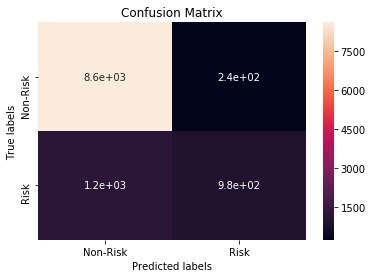

In [149]:
# Get the results 
# get_model_results(X_train, y_train, X_test, y_test, ensemble_model)

ensemble_model.fit(X_train,y_train)
predicted = ensemble_model.predict(X_test)
# probs = ensemble_model.predict_proba(X_test)

print("ROC SCORE: " + str(roc_auc_score(y_test, predicted)))
print ("ACCURACY SCORE: " + str(accuracy_score(y_test, predicted)))
print ("CLASSIFICATION REPORT: \n" + classification_report(y_test, predicted))

km_cm = confusion_matrix(y_true=y_test, y_pred=predicted)

# # Plot the confusion matrix in a figure to visualize results 
print(km_cm)
ax= plt.subplot()
sns.heatmap(km_cm, annot=True, ax = ax); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Non-Risk', 'Risk']); ax.yaxis.set_ticklabels(['Non-Risk', 'Risk']);